## References

- https://www.kaggle.com/sreejiths0/efficient-tweet-preprocessing

## Dataset Exploration

In [177]:
%load_ext nb_black

import pandas as pd

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [178]:
train_dataset = pd.read_csv("data/train.csv")
test_dataset = pd.read_csv("data/test.csv")
train_dataset

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


<IPython.core.display.Javascript object>

In [179]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


<IPython.core.display.Javascript object>

In [180]:
train_dataset["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

<IPython.core.display.Javascript object>

In [181]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


<IPython.core.display.Javascript object>

In [182]:
test_dataset.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


<IPython.core.display.Javascript object>

## Tokenisation

In [183]:
!pip install tweet-preprocessor
!pip install gensim

<IPython.core.display.Javascript object>

In [184]:
import string
import preprocessor as p
from gensim.parsing.preprocessing import remove_stopwords


def tokenize_tweet(tweet):
    clean_tweet = p.clean(
        tweet.lower().replace("#", " ").replace("&amp;", " ").replace("'", "")
    )
    tweet_without_stop_words = remove_stopwords(clean_tweet)
    clean_tweet2 = re.sub(f"[^a-z0-9]", " ", tweet_without_stop_words)
    return list(
        filter(
            lambda token: len(token) > 1,
            map(lambda token: token.strip(), clean_tweet2.split(" ")),
        )
    )

<IPython.core.display.Javascript object>

In [185]:
tokenize_tweet("hey! how are You? #trending &amp; don't")

['hey', 'you', 'trending', 'dont']

<IPython.core.display.Javascript object>

In [186]:
"pardeep".replace(r"[a-z]", "0")

'pardeep'

<IPython.core.display.Javascript object>

In [187]:
import re

re.sub(r"[^a-zA-Z,.!?0-9]", " ", "pardeep!P**123")

'pardeep!P  123'

<IPython.core.display.Javascript object>

In [188]:
train_dataset["tokens"] = train_dataset["text"].apply(tokenize_tweet)
test_dataset["tokens"] = test_dataset["text"].apply(tokenize_tweet)

<IPython.core.display.Javascript object>

In [189]:
train_dataset.head()

,id,keyword,location,text,target,tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[deeds, reason, earthquake, allah, forgive]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


<IPython.core.display.Javascript object>

In [190]:
test_dataset.head()

,id,keyword,location,text,tokens
0,0,NaN,NaN,Just happened a terrible car crash,"[happened, terrible, car, crash]"
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...","[heard, earthquake, different, cities, stay, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...","[forest, spot, pond, geese, fleeing, street, s..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,"[apocalypse, lighting, spokane, wildfires]"
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,"[typhoon, soudelor, kills, china, taiwan]"


<IPython.core.display.Javascript object>

In [191]:
positive_class_tokens = reduce(
    lambda x, y: x + y, train_dataset[train_dataset["target"] == 1]["tokens"].values
)
negative_class_tokens = reduce(
    lambda x, y: x + y, train_dataset[train_dataset["target"] == 0]["tokens"].values
)
test_dataset_tokens = reduce(lambda x, y: x + y, test_dataset["tokens"].values)
print(len(positive_class_tokens), len(negative_class_tokens), len(test_dataset_tokens))

29240 34074 27332


<IPython.core.display.Javascript object>

In [192]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

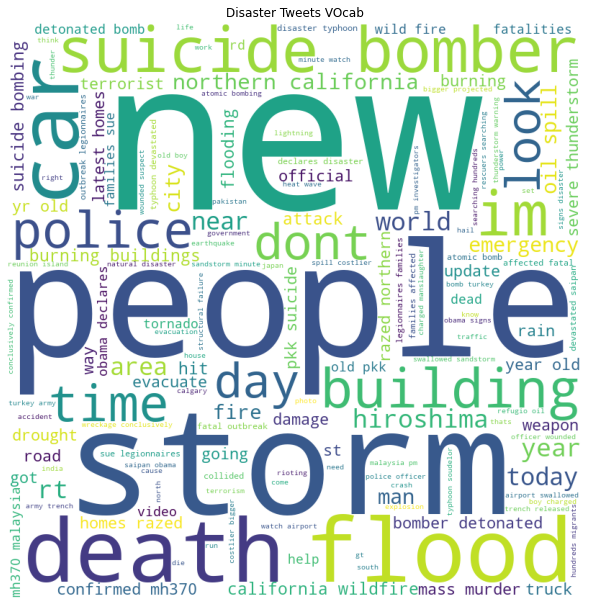

<IPython.core.display.Javascript object>

In [193]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    width=800, height=800, background_color="white", min_font_size=10
).generate(" ".join(positive_class_tokens))
# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Disaster Tweets VOcab")
plt.show()

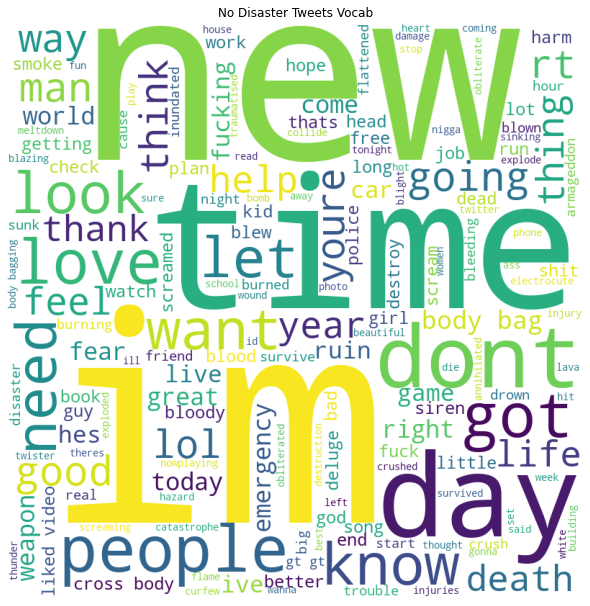

<IPython.core.display.Javascript object>

In [194]:
wordcloud = WordCloud(
    width=800, height=800, background_color="white", min_font_size=10
).generate(" ".join(negative_class_tokens))
# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("No Disaster Tweets Vocab")
plt.show()

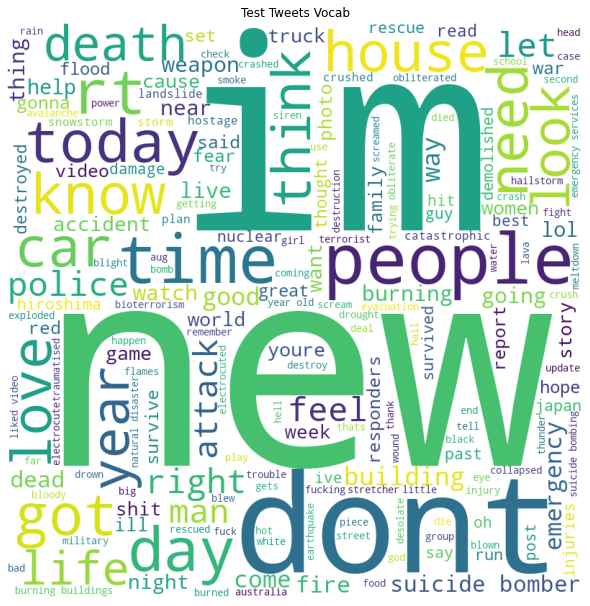

<IPython.core.display.Javascript object>

In [195]:
wordcloud = WordCloud(
    width=800, height=800, background_color="white", min_font_size=10
).generate(" ".join(test_dataset_tokens))
# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Test Tweets Vocab")
plt.show()

In [196]:
common_train_tokens = set(positive_class_tokens).intersection(
    set(negative_class_tokens)
)
difference_train_tokens = set(positive_class_tokens).difference(
    set(negative_class_tokens)
)
difference_train_test_tokens = set(test_dataset_tokens).difference(
    set(positive_class_tokens).union(set(negative_class_tokens))
)
print(
    "Total unique train tokens:",
    len(set(positive_class_tokens).union(set(negative_class_tokens))),
    "\nTotal unique test tokens:",
    len(set(test_dataset_tokens)),
    "\nUnique Disaster Tweets Tokens:",
    len(set(positive_class_tokens)),
    "\nUnique Non Disaster Tweets Tokens:",
    len(set(negative_class_tokens)),
    "\nCommon Train Tokens:",
    len(common_tokens),
    "\nDifference Train Tokens:",
    len(difference_train_tokens),
    "\nDifference Train Test Tokens:",
    len(difference_train_test_tokens),
)

Total unique train tokens: 14558 
Total unique test tokens: 8898 
Unique Disaster Tweets Tokens: 8004 
Unique Non Disaster Tweets Tokens: 10375 
Common Train Tokens: 3821 
Difference Train Tokens: 4183 
Difference Train Test Tokens: 3387


<IPython.core.display.Javascript object>

In [197]:
from collections import Counter

positive_tokens_counts = Counter(positive_class_tokens)
negative_tokens_counts = Counter(negative_class_tokens)


def top_counts(counts, n=10, reverse=False):
    return sorted(counts.items(), key=lambda item: item[1], reverse=reverse)[:n]

<IPython.core.display.Javascript object>

In [198]:
print(
    len(positive_tokens_counts.keys()),
    len(negative_tokens_counts.keys()),
    len(list(filter(lambda value: value > 5, positive_tokens_counts.values()))),
    len(list(filter(lambda value: value > 5, negative_tokens_counts.values()))),
)

8004 10375 1099 1253


<IPython.core.display.Javascript object>

In [199]:
top_counts(positive_tokens_counts, 5), top_counts(
    positive_tokens_counts, 5, reverse=True
)

([('deeds', 1), ('forgive', 1), ('ronge', 1), ('sask', 1), ('asked', 1)],
 [('news', 142),
  ('disaster', 121),
  ('suicide', 112),
  ('california', 111),
  ('police', 108)])

<IPython.core.display.Javascript object>

In [200]:
top_counts(negative_tokens_counts, 5), top_counts(
    negative_tokens_counts, 5, reverse=True
)

([('goooooooaaaaaal', 1),
  ('skiing', 1),
  ('looooool', 1),
  ('cooool', 1),
  ('epl', 1)],
 [('like', 253), ('im', 250), ('new', 170), ('dont', 154), ('body', 115)])

<IPython.core.display.Javascript object>

In [201]:
import seaborn as sns

<IPython.core.display.Javascript object>

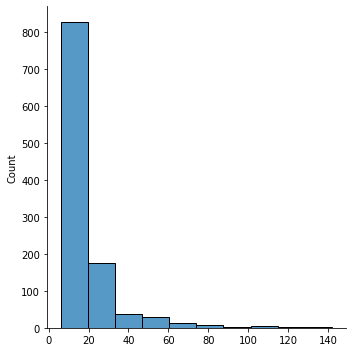

<IPython.core.display.Javascript object>

In [202]:
sns.displot(
    list(filter(lambda value: value > 5, positive_tokens_counts.values())), bins=10
)

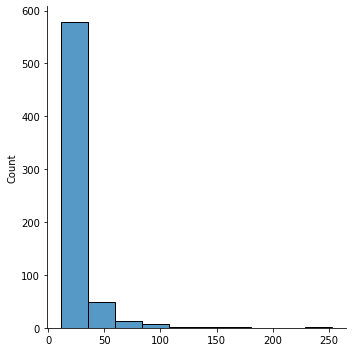

<IPython.core.display.Javascript object>

In [203]:
sns.displot(
    list(filter(lambda value: value > 10, negative_tokens_counts.values())), bins=10
)

## Location Column

In [228]:
list(
    train_dataset[~train_dataset["location"].isnull()]["location"]
    .value_counts()
    .items()
)

[('USA', 104),
 ('New York', 71),
 ('United States', 50),
 ('London', 45),
 ('Canada', 29),
 ('Nigeria', 28),
 ('UK', 27),
 ('Los Angeles, CA', 26),
 ('India', 24),
 ('Mumbai', 22),
 ('Washington, DC', 21),
 ('Kenya', 20),
 ('Worldwide', 19),
 ('Australia', 18),
 ('Chicago, IL', 18),
 ('California', 17),
 ('New York, NY', 15),
 ('California, USA', 15),
 ('Everywhere', 15),
 ('Florida', 14),
 ('San Francisco', 14),
 ('United Kingdom', 14),
 ('Washington, D.C.', 13),
 ('Indonesia', 13),
 ('Los Angeles', 13),
 ('Toronto', 12),
 ('Ireland', 12),
 ('NYC', 12),
 ('Chicago', 11),
 ('Earth', 11),
 ('San Francisco, CA', 11),
 ('Seattle', 11),
 ('London, UK', 10),
 ('Texas', 10),
 ('ss', 10),
 ('London, England', 10),
 ('New York City', 10),
 ('Atlanta, GA', 10),
 ('Sacramento, CA', 10),
 ('Dallas, TX', 9),
 ('Manchester', 9),
 ('San Diego, CA', 9),
 ('Denver, Colorado', 9),
 ('304', 9),
 ('World', 9),
 ('Nashville, TN', 9),
 ('US', 9),
 ('Scotland', 8),
 ('Houston, TX', 8),
 ('South Africa', 8)

<IPython.core.display.Javascript object>

In [230]:
list(
    test_dataset[~test_dataset["location"].isnull()]["location"].value_counts().items()
)

[('New York', 38),
 ('USA', 37),
 ('Worldwide', 16),
 ('United States', 15),
 ('London', 13),
 ('Canada', 13),
 ('United Kingdom', 12),
 ('Kenya', 12),
 ('Nigeria', 12),
 ('India', 11),
 ('Los Angeles', 11),
 ('Washington, DC', 10),
 ('San Francisco, CA', 9),
 ('San Francisco', 9),
 ('NYC', 9),
 ('Philippines', 9),
 ('California', 8),
 ('Los Angeles, CA', 8),
 ('Singapore', 7),
 ('Australia', 7),
 ('Seattle, WA', 7),
 ('Florida', 7),
 ('New York, NY', 7),
 ('Chicago', 6),
 ('Melbourne, Australia', 6),
 ('California, USA', 6),
 ('Mumbai', 6),
 ('UK', 6),
 ('Maryland', 5),
 ('Calgary, Alberta', 5),
 ('Paterson, New Jersey ', 5),
 ('Chicago, IL', 5),
 ('Las Vegas', 5),
 ('Denver, CO', 5),
 ('Las Vegas, NV', 4),
 ('ss', 4),
 ('Indiana', 4),
 ('Sydney, Australia', 4),
 ('Michigan', 4),
 ('Toronto', 4),
 (' Road to the Billionaires Club', 4),
 ('San Diego', 4),
 ('New Jersey, USA', 4),
 ('Orlando', 4),
 ('Memphis, TN', 4),
 ('Philadelphia, PA', 4),
 ('Liverpool', 4),
 ('Colorado', 4),
 ('Eng

<IPython.core.display.Javascript object>

## Keyword Column

In [231]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
 5   tokens    7613 non-null   object
dtypes: int64(2), object(4)
memory usage: 357.0+ KB


<IPython.core.display.Javascript object>

In [232]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
 4   tokens    3263 non-null   object
dtypes: int64(1), object(4)
memory usage: 127.6+ KB


<IPython.core.display.Javascript object>

In [226]:
sorted(
    list(
        train_dataset[~train_dataset["keyword"].isnull()]["keyword"]
        .value_counts()
        .keys()
    )
)

['ablaze',
 'accident',
 'aftershock',
 'airplane%20accident',
 'ambulance',
 'annihilated',
 'annihilation',
 'apocalypse',
 'armageddon',
 'army',
 'arson',
 'arsonist',
 'attack',
 'attacked',
 'avalanche',
 'battle',
 'bioterror',
 'bioterrorism',
 'blaze',
 'blazing',
 'bleeding',
 'blew%20up',
 'blight',
 'blizzard',
 'blood',
 'bloody',
 'blown%20up',
 'body%20bag',
 'body%20bagging',
 'body%20bags',
 'bomb',
 'bombed',
 'bombing',
 'bridge%20collapse',
 'buildings%20burning',
 'buildings%20on%20fire',
 'burned',
 'burning',
 'burning%20buildings',
 'bush%20fires',
 'casualties',
 'casualty',
 'catastrophe',
 'catastrophic',
 'chemical%20emergency',
 'cliff%20fall',
 'collapse',
 'collapsed',
 'collide',
 'collided',
 'collision',
 'crash',
 'crashed',
 'crush',
 'crushed',
 'curfew',
 'cyclone',
 'damage',
 'danger',
 'dead',
 'death',
 'deaths',
 'debris',
 'deluge',
 'deluged',
 'demolish',
 'demolished',
 'demolition',
 'derail',
 'derailed',
 'derailment',
 'desolate',
 'de

<IPython.core.display.Javascript object>

In [225]:
sorted(
    list(
        test_dataset[~test_dataset["keyword"].isnull()]["keyword"].value_counts().keys()
    )
)

['ablaze',
 'accident',
 'aftershock',
 'airplane%20accident',
 'ambulance',
 'annihilated',
 'annihilation',
 'apocalypse',
 'armageddon',
 'army',
 'arson',
 'arsonist',
 'attack',
 'attacked',
 'avalanche',
 'battle',
 'bioterror',
 'bioterrorism',
 'blaze',
 'blazing',
 'bleeding',
 'blew%20up',
 'blight',
 'blizzard',
 'blood',
 'bloody',
 'blown%20up',
 'body%20bag',
 'body%20bagging',
 'body%20bags',
 'bomb',
 'bombed',
 'bombing',
 'bridge%20collapse',
 'buildings%20burning',
 'buildings%20on%20fire',
 'burned',
 'burning',
 'burning%20buildings',
 'bush%20fires',
 'casualties',
 'casualty',
 'catastrophe',
 'catastrophic',
 'chemical%20emergency',
 'cliff%20fall',
 'collapse',
 'collapsed',
 'collide',
 'collided',
 'collision',
 'crash',
 'crashed',
 'crush',
 'crushed',
 'curfew',
 'cyclone',
 'damage',
 'danger',
 'dead',
 'death',
 'deaths',
 'debris',
 'deluge',
 'deluged',
 'demolish',
 'demolished',
 'demolition',
 'derail',
 'derailed',
 'derailment',
 'desolate',
 'de

<IPython.core.display.Javascript object>

In [234]:
train_dataset[~train_dataset["keyword"].isnull()][["keyword", "target", "tokens"]]

,keyword,target,tokens
31,ablaze,1,"[wholesale, markets, ablaze]"
32,ablaze,0,"[try, bring, heavy, metal, rt]"
33,ablaze,1,"[africanbaze, breaking, news, nigeria, flag, s..."
34,ablaze,0,"[crying, more, set, ablaze]"
35,ablaze,0,"[plus, look, sky, night, ablaze]"
...,...,...,...
7578,wrecked,0,[wrecked]
7579,wrecked,0,"[days, work, theyve, pretty, wrecked, hahaha, ..."
7580,wrecked,0,"[fx, forex, trading, cramer, igers, words, wre..."
7581,wrecked,0,"[great, atmosphere, british, lion, gig, tonigh..."


<IPython.core.display.Javascript object>

## Creating Train, Val & Test Splits

In [268]:
import collections
import numpy as np

train_proportion, val_proportion, test_proportion = 0.7, 0.15, 0.15
print(train_proportion, val_proportion, test_proportion)

by_target = collections.defaultdict(list)
n_total = train_dataset.shape[0]
for _, row in train_dataset[["id", "keyword", "location", "text", "target"]].iterrows():
    by_target[row.target].append(row.to_dict())

final_list = []
np.random.seed(19)

for _, item_list in sorted(by_target.items()):

    np.random.shuffle(item_list)

    n_total = len(item_list)
    n_train = int(train_proportion * n_total)
    n_val = int(val_proportion * n_total)
    n_test = int(test_proportion * n_total)

    # Give data point a split attribute
    for item in item_list[:n_train]:
        item["split"] = "train"

    for item in item_list[n_train : n_train + n_val]:
        item["split"] = "val"

    for item in item_list[n_train + n_val : n_train + n_val + n_test]:
        item["split"] = "test"

    # Add to final list
    final_list.extend(item_list)
train_dataset_with_splits = pd.DataFrame(final_list)
train_dataset_with_splits.info()
train_dataset_with_splits[train_dataset_with_splits["split"].isna()]
train_dataset_with_splits["split"] = train_dataset_with_splits["split"].fillna("train")
train_dataset_with_splits.to_csv("data/train_with_splits.csv", index=False)

0.7 0.15 0.15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
 5   split     7610 non-null   object
dtypes: int64(2), object(4)
memory usage: 357.0+ KB


<IPython.core.display.Javascript object>

In [269]:
train_dataset_with_splits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
 5   split     7613 non-null   object
dtypes: int64(2), object(4)
memory usage: 357.0+ KB


<IPython.core.display.Javascript object>

In [271]:
train_dataset_with_splits["split"].value_counts()

train    5331
test     1141
val      1141
Name: split, dtype: int64

<IPython.core.display.Javascript object>